# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [107]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


In [109]:
df['Income'] = (
    df['Income'].str.replace('.', '',regex=False)
        .str.replace(',', '.',regex=False)
        .astype(float)
               )

In [110]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35.0,Female,75000.0,Doctorate,Married,1,Owned,High
3,40.0,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45.0,Female,100000.0,Bachelor's Degree,Married,3,Owned,High


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [111]:
(df.isnull().sum() / len(df)) * 100

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

In [112]:
df['Age'].mean()

np.float64(37.50769230769231)

In [113]:
df['Age'].median()

36.0

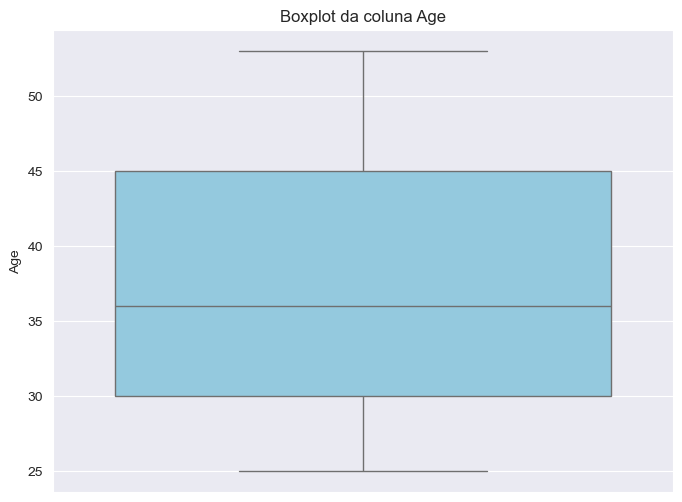

In [114]:
sns.set_style('darkgrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Age', color='skyblue')
plt.title('Boxplot da coluna Age')
plt.ylabel('Age')
plt.show()

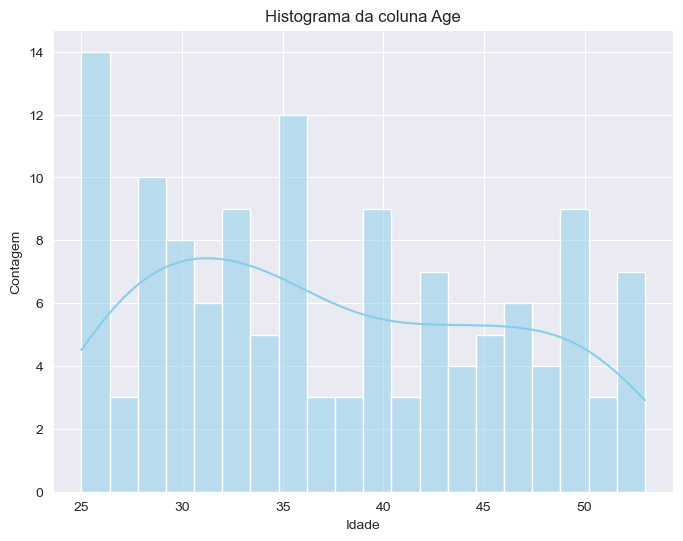

In [115]:
sns.set_style('darkgrid')

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Histograma da coluna Age')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

In [116]:
mediana_age = df['Age'].median()
df.fillna({'Age': mediana_age}, inplace=True)

In [117]:
df['Age'].isnull().sum()

np.int64(0)

A coluna **Age** possuía cerca de 20% dos dados nulos, correspondendo a uma parte significativa do DataFrame. Por esse motivo, foi utilizada a técnica de substituição dos dados.  

Ao análisar a média e a mediana, verificou-se que os dois valores eram próximos, sendo utilizada a mediana para preencher os dados faltantes.

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [118]:
colunas_categoricas = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

for col in colunas_categoricas:
    print(f'\n{col}:')
    print(df[col].unique())


Gender:
['Female' 'Male']

Education:
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]

Marital Status:
['Single' 'Married']

Home Ownership:
['Rented' 'Owned']

Credit Score:
['High' 'Average' 'Low']


# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [119]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


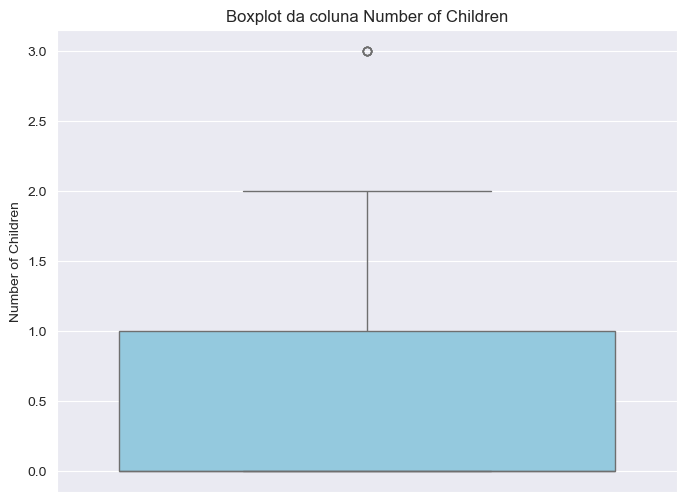

In [120]:
sns.set_style('darkgrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Number of Children', color='skyblue')
plt.title('Boxplot da coluna Number of Children')
plt.ylabel('Number of Children')
plt.show()

Ao usar a função 'describe' para análisar as variáveis numéricas verificamos que as colunas **Age** e **Income** possuem média e 50% muito próximos, isso signica uma distribuição muito próxima a normal, sem a presença de outliers.  

Na coluna **Number of Children** verificamos que o 25% e 50% foram 0 e, ao plotar o boxplot, nota-se a presença de um possível outlier. Contudo, essa variável é composta apenas por números interios que variam de 0 a 3, sendo assim, não seria correto categorizar como outlier o ponto indicado no gráfico.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

In [121]:
'Education', 'Marital Status', 'Home Ownership', 'Credit Score'

('Education', 'Marital Status', 'Home Ownership', 'Credit Score')

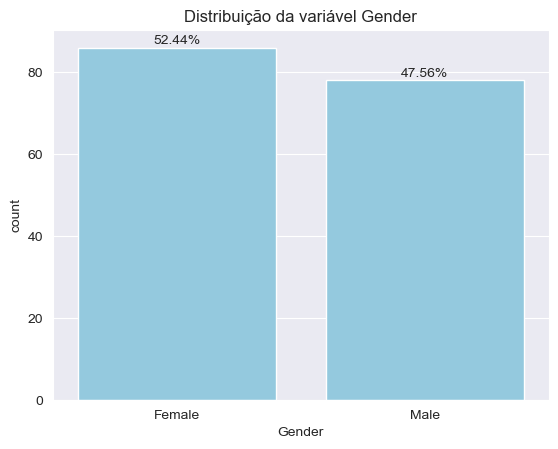

In [122]:
contagem_genero = df['Gender'].value_counts()
porcentagem_genero = (contagem_genero / contagem_genero.sum()) * 100

sns.set_style('darkgrid')
ax = sns.countplot(x='Gender', data=df, color='skyblue')
for i, v in enumerate(contagem_genero):
    ax.text(i, v + 1, f'{porcentagem_genero.iloc[i]:.2f}%', ha='center')
plt.title('Distribuição da variável Gender')
plt.show()

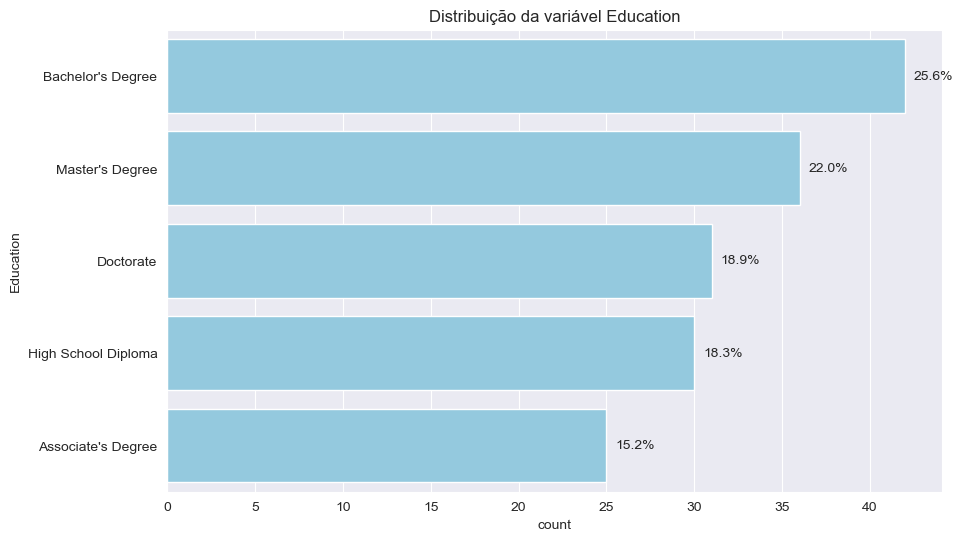

In [123]:
contagem_educacao = df['Education'].value_counts()
porcentagem_educacao = (contagem_educacao / contagem_educacao.sum()) * 100

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

ax = sns.countplot(y='Education', data=df, order=contagem_educacao.index, color='skyblue')
for i, p in enumerate(ax.patches):
    largura = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(largura + 0.5, y, f'{porcentagem_educacao.iloc[i]:.1f}%', va='center')
    
plt.title('Distribuição da variável Education')
plt.show()

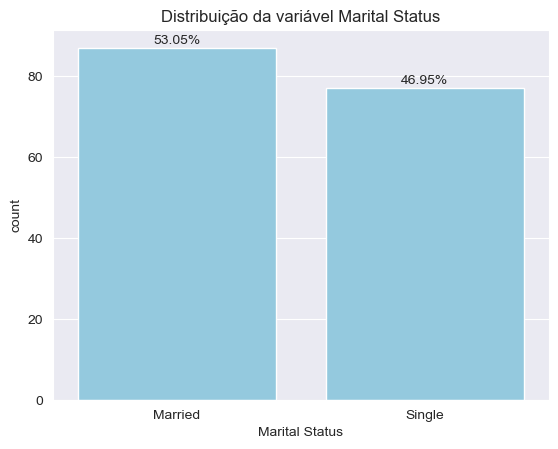

In [124]:
contagem_estado_civil = df['Marital Status'].value_counts()
porcentagem_estado_civil = (contagem_estado_civil / contagem_estado_civil.sum()) * 100

sns.set_style('darkgrid')
ax = sns.countplot(x='Marital Status', data=df, order=contagem_estado_civil.index, color='skyblue')
for i, v in enumerate(contagem_estado_civil):
    ax.text(i, v + 1, f'{porcentagem_estado_civil.iloc[i]:.2f}%', ha='center')
plt.title('Distribuição da variável Marital Status')
plt.show()

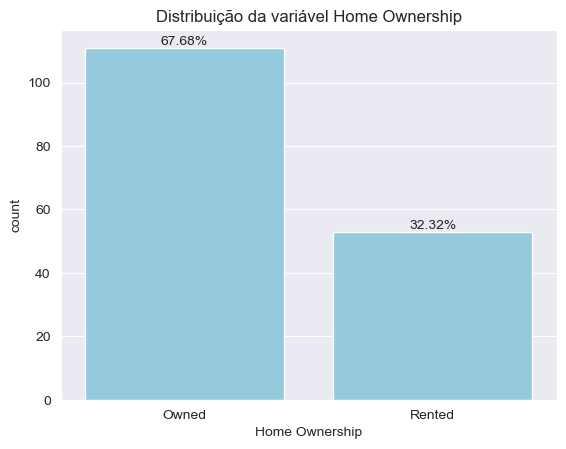

In [125]:
contagem_residencia_propria = df['Home Ownership'].value_counts()
porcentagem_residencia_propria = (contagem_residencia_propria / contagem_residencia_propria.sum()) * 100

sns.set_style('darkgrid')
ax = sns.countplot(x='Home Ownership', data=df, order=contagem_residencia_propria.index, color='skyblue')
for i, v in enumerate(contagem_residencia_propria):
    ax.text(i, v + 1, f'{porcentagem_residencia_propria.iloc[i]:.2f}%', ha='center')
plt.title('Distribuição da variável Home Ownership')
plt.show()

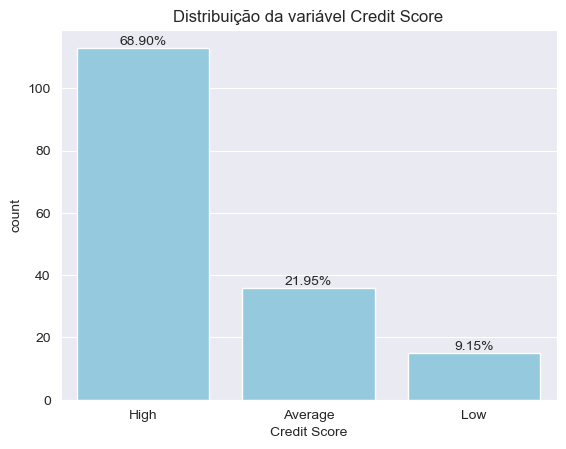

In [126]:
contagem_score = df['Credit Score'].value_counts()
porcentagem_score = (contagem_score / contagem_score.sum()) * 100

sns.set_style('darkgrid')
ax = sns.countplot(x='Credit Score', data=df, order=contagem_score.index, color='skyblue')
for i, v in enumerate(contagem_score):
    ax.text(i, v + 1, f'{porcentagem_score.iloc[i]:.2f}%', ha='center')
plt.title('Distribuição da variável Credit Score')
plt.show()

Plotando os gráficos observamos que as várias **Gender** e **Marital Status** possuem uma boa distribuição de de seus dados, sendo variáveis balanceadas.   
  
As variáveis **Home Ownership** e **Credit Score** possuem uma distribuição majoritária. Outro ponto que deserta a atenção entre essas duas variáveis é a porcentagem de clientes que possuem casa própria e um score alto é muito semelhante, sendo 67,68% e 68,9% respectivamente.

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

Não localizei colunas com outliers a serem tratados. 

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



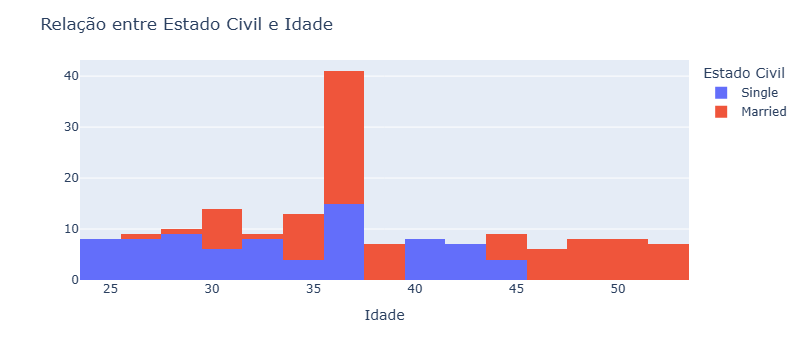

In [127]:
fig = px.histogram(df, x='Age', color='Marital Status', barmode='stack')

fig.update_layout(title='Relação entre Estado Civil e Idade',
                  xaxis_title= 'Idade',
                  yaxis_title= '',
                  legend_title= 'Estado Civil')
fig.show()

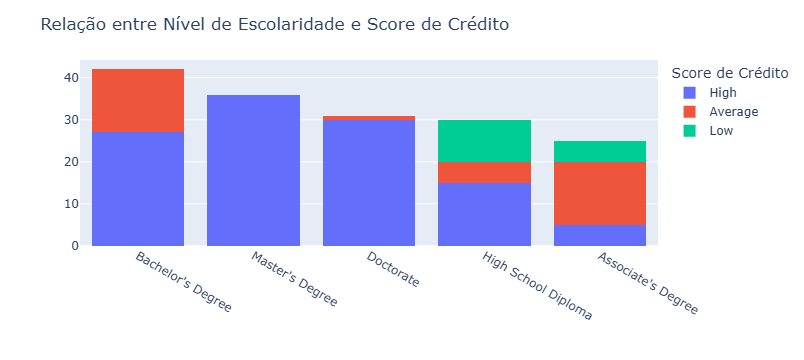

In [128]:
fig = px.histogram(df, x='Education', color='Credit Score', barmode='stack')

fig.update_layout(title='Relação entre Nível de Escolaridade e Score de Crédito',
                  xaxis_title= ' ',
                  yaxis_title= '',
                  legend_title= 'Score de Crédito')
fig.show()

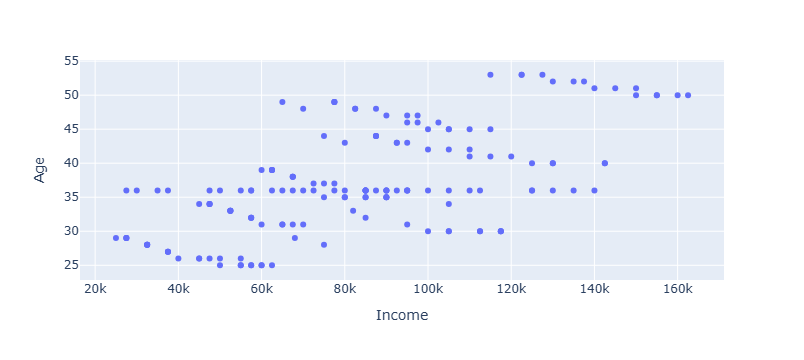

<Figure size 1000x600 with 0 Axes>

In [149]:
plt.figure(figsize=(10, 6))
fig = px.scatter(df, x='Income', y='Age')
fig.show()

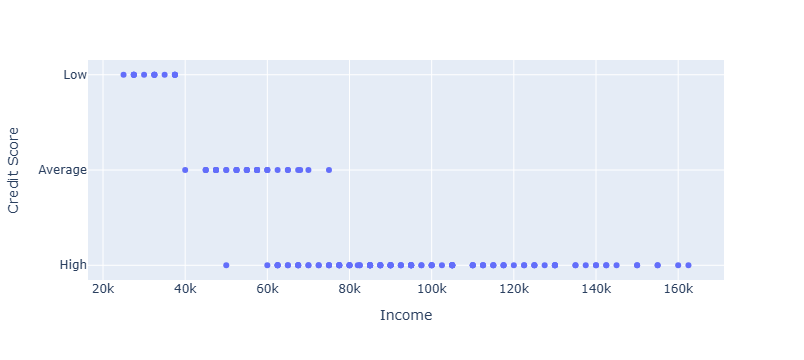

<Figure size 1000x600 with 0 Axes>

In [140]:
plt.figure(figsize=(10, 6))
fig = px.scatter(df, x='Income', y='Credit Score')
fig.show()

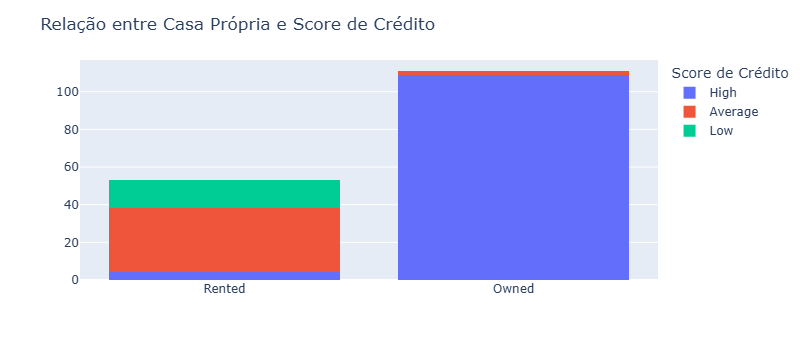

In [150]:
fig = px.histogram(df, x='Home Ownership', color='Credit Score', barmode='stack')

fig.update_layout(title='Relação entre Casa Própria e Score de Crédito',
                  xaxis_title= ' ',
                  yaxis_title= '',
                  legend_title= 'Score de Crédito')
fig.show()

Na relação **Estado Civil** e **Idade** observamos que a partir de 45 anos há majoritariamente casados. Entre 35 e 40 encontr-ase um pico de clientes com os estado civil de casado, contudo, isso pode ter ocorrido devido ao tipo de tratamento dos dados nulos que optou por inserir os dados faltantes.  

Ao observarmos as variáveis **Nível de escolaridade** e **Score de Crédito** temos que, apartir do nível técnico não há clientes com score baixo, esse se faz presente apenas nos níveis técnico e médio.  

A relação entre **Score de Crédito** e **Salário** temos que os maiores salários se concentram na categoria de score alto enquanto os menores salários estão na categoria se score baixa.  

Avaliando a relação das variáveis **Casa Própria** e **Score de Crédito** temos que quase todos aqueles que possuem casa própria estão na categoria de score alto. Já grande parcela daqueles que alugam possuem score médio. 

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

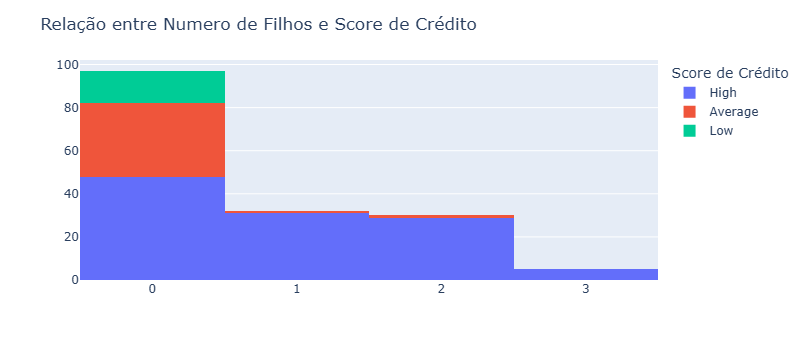

In [141]:
fig = px.histogram(df, x='Number of Children', color='Credit Score', barmode='stack')

fig.update_layout(title='Relação entre Numero de Filhos e Score de Crédito',
                  xaxis_title= ' ',
                  yaxis_title= '',
                  legend_title= 'Score de Crédito')
fig.show()

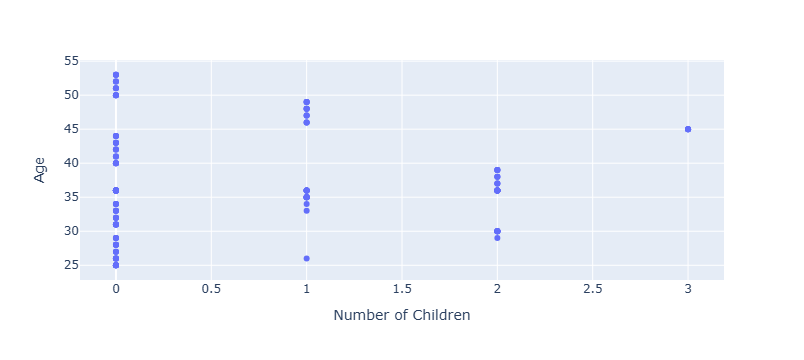

<Figure size 1000x600 with 0 Axes>

In [152]:
plt.figure(figsize=(10, 6))
fig = px.scatter(df, x='Number of Children', y='Age')
fig.show()

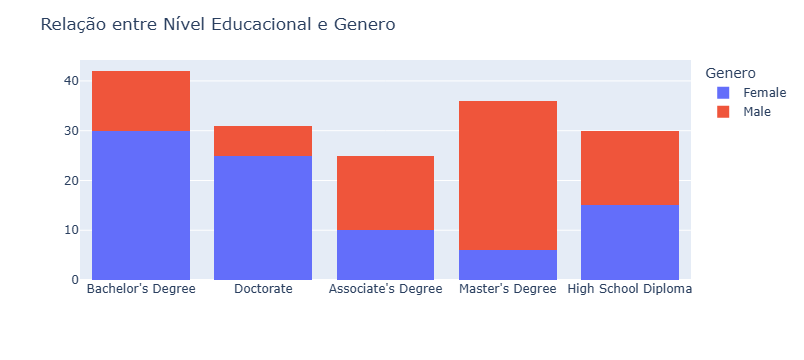

In [144]:
fig = px.histogram(df, x='Education', color='Gender', barmode='stack')

fig.update_layout(title='Relação entre Nível Educacional e Genero',
                  xaxis_title= ' ',
                  yaxis_title= '',
                  legend_title= 'Genero')
fig.show()

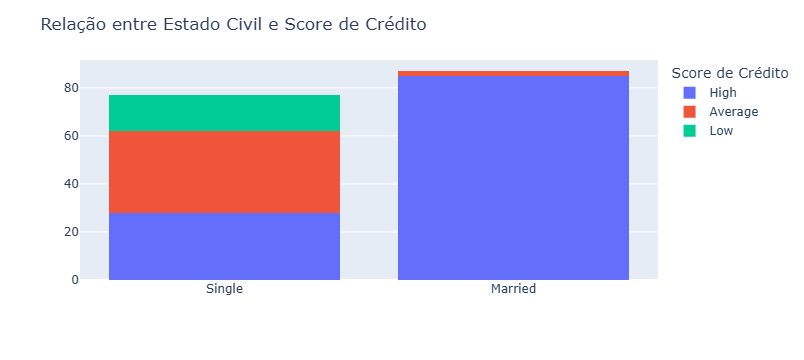

In [148]:
fig = px.histogram(df, x='Marital Status', color='Credit Score', barmode='stack')

fig.update_layout(title='Relação entre Estado Civil e Score de Crédito',
                  xaxis_title= ' ',
                  yaxis_title= '',
                  legend_title= 'Score de Crédito')
fig.show()

Após avaliar as variáveis **Numero de Filhos** e **Score de Crédito** podemos observar que aqueles que possuem filhos, em sua grande maioria, possuem score alto e apenas alguns poucos score médio.  

Ao fazer uma mapa de dispersão das variáveis **Números de Filhos** e **Idade** é possível verificar não haver uma concentração de idade entre os clientes que não possuem filhos.  
  
Também é possível observar uma maior concentração de mulheres entre as pessoas que possuem Doutorado, sendo importante relembrar que esse nível de graduação possui uma grande concentração de clientes com score alto.  

Por fim, verificou-se que entre os clientes casados a grande maioria possui um score alto. 

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [153]:
df.select_dtypes(include=['number']).corr()

,Age,Income,Number of Children
Age,1.000000,0.621492,0.072432
Income,0.621492,1.000000,0.084547
Number of Children,0.072432,0.084547,1.000000


**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

As variáveis **Idade** e **Income** apresentam uma correlação alta, o que pode ser explicado pelo fato de que, em geral, a renda tende a aumentar à medida que a pessoa adquire mais experiência no mercado de trabalho.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [154]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35.0,Female,75000.0,Doctorate,Married,1,Owned,High
3,40.0,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45.0,Female,100000.0,Bachelor's Degree,Married,3,Owned,High


In [157]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [159]:
le = LabelEncoder()

df['Gender_encoded'] = le.fit_transform(df['Gender'])
df['Marital_Status_encoded'] = le.fit_transform(df['Marital Status'])
df['Home_Ownership_encoded'] = le.fit_transform(df['Home Ownership'])

encoder = OrdinalEncoder(categories=[['Low', 'Average', 'High']])
df['Credit_Score_encoded'] = encoder.fit_transform(df[['Credit Score']])

df = pd.get_dummies(df, columns=['Education'], prefix='Education', drop_first=True)

In [160]:
df.head()

,Age,Gender,Income,Marital Status,Number of Children,Home Ownership,Credit Score,Gender_encoded,Marital_Status_encoded,Home_Ownership_encoded,Credit_Score_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,25.0,Female,50000.0,Single,0,Rented,High,0,1,1,2.0,True,False,False,False
1,30.0,Male,100000.0,Married,2,Owned,High,1,0,0,2.0,False,False,False,True
2,35.0,Female,75000.0,Married,1,Owned,High,0,0,0,2.0,False,True,False,False
3,40.0,Male,125000.0,Single,0,Owned,High,1,1,0,2.0,False,False,True,False
4,45.0,Female,100000.0,Married,3,Owned,High,0,0,0,2.0,True,False,False,False


In [165]:
df=df.drop(['Gender'], axis=1)
df=df.drop(['Marital Status'], axis=1)
df=df.drop(['Home Ownership'], axis=1)
df=df.drop(['Credit Score'], axis=1)

In [166]:
print(df)

      Age    Income  Number of Children  Gender_encoded  \
0    25.0   50000.0                   0               0   
1    30.0  100000.0                   2               1   
2    35.0   75000.0                   1               0   
3    40.0  125000.0                   0               1   
4    45.0  100000.0                   3               0   
..    ...       ...                 ...             ...   
159  29.0   27500.0                   0               0   
160  34.0   47500.0                   0               1   
161  39.0   62500.0                   2               0   
162  44.0   87500.0                   0               1   
163  49.0   77500.0                   1               0   

     Marital_Status_encoded  Home_Ownership_encoded  Credit_Score_encoded  \
0                         1                       1                   2.0   
1                         0                       0                   2.0   
2                         0                       0         

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [174]:
df.select_dtypes(include=['number']).corr()

,Age,Income,Number of Children,Gender_encoded,Marital_Status_encoded,Home_Ownership_encoded,Credit_Score_encoded
Age,1.000000,0.621492,0.072432,0.204661,-0.449115,-0.628042,0.572247
Income,0.621492,1.000000,0.084547,0.495738,-0.471004,-0.704928,0.744407
Number of Children,0.072432,0.084547,1.000000,-0.442139,-0.696984,-0.497129,0.426280
Gender_encoded,0.204661,0.495738,-0.442139,1.000000,0.278362,-0.031519,0.194962
Marital_Status_encoded,-0.449115,-0.471004,-0.696984,0.278362,1.000000,0.708374,-0.619854
Home_Ownership_encoded,-0.628042,-0.704928,-0.497129,-0.031519,0.708374,1.000000,-0.854970
Credit_Score_encoded,0.572247,0.744407,0.426280,0.194962,-0.619854,-0.854970,1.000000


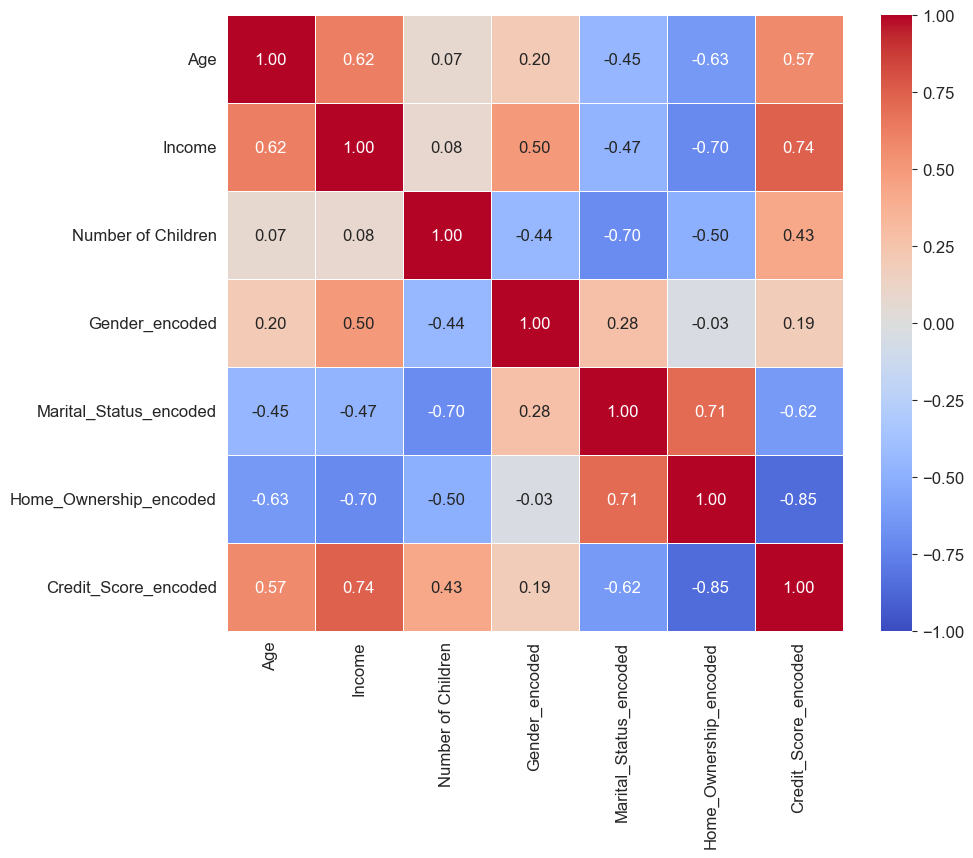

In [175]:
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(corr, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

As variáveis que possuem correlações altas são:
- Credit Score X Age
- Credit Score X Income
- Credit Score X Marital Status
- Credit Score X Home Ownership
- Home Ownership X Income
- Home Ownership X Marital Status
- Marital Status X Number of Children
- Income X Age

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [177]:
x = df.drop('Credit_Score_encoded', axis=1)
y = df['Credit_Score_encoded']

In [178]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [184]:
print('Tamanho do x_train:', x_train.shape)

Tamanho do x_train: (123, 10)


In [183]:
print('Tamanho do y_train:', y_train.shape)

Tamanho do y_train: (123,)


In [182]:
print('Tamanho do x_test:', x_test.shape)

Tamanho do x_test: (41, 10)


In [181]:
print('Tamanho do y_test:', y_test.shape)

Tamanho do y_test: (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

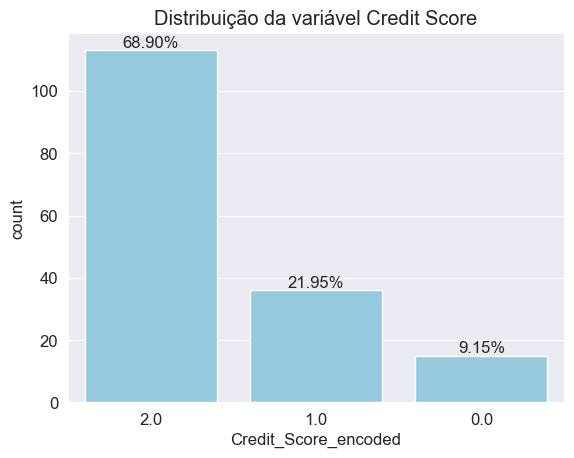

In [185]:
contagem_score = df['Credit_Score_encoded'].value_counts()
porcentagem_score = (contagem_score / contagem_score.sum()) * 100

sns.set_style('darkgrid')
ax = sns.countplot(x='Credit_Score_encoded', data=df, order=contagem_score.index, color='skyblue')
for i, v in enumerate(contagem_score):
    ax.text(i, v + 1, f'{porcentagem_score.iloc[i]:.2f}%', ha='center')
plt.title('Distribuição da variável Credit Score')
plt.show()

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [186]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

In [189]:
print('Distribuição das classes após balanceamento:\n', y_train_balanced.value_counts(). sort_index())

Distribuição das classes após balanceamento:
 Credit_Score_encoded
0.0    84
1.0    84
2.0    84
Name: count, dtype: int64


In [190]:
y_train_balanced.to_csv('y_train_balanced.csv', index=False)

In [191]:
x_train_balanced.to_csv('x_train_balanced.csv', index=False)

In [194]:
y_test.to_csv('y_test_balanced.csv', index=False)

In [195]:
x_test.to_csv('x_test_balanced.csv', index=False)